## Seaborn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [2]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


### box graph 그리기

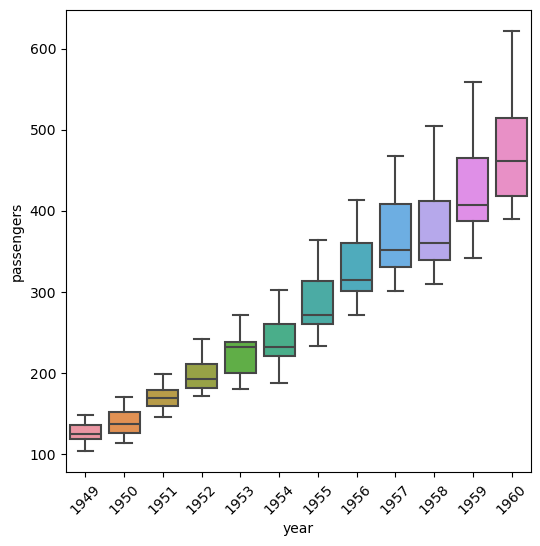

In [3]:
# seaborn

plt.figure(figsize=(6, 6))
sns.boxplot(data=flights, x='year', y='passengers')
plt.xticks(rotation=45)
plt.show()

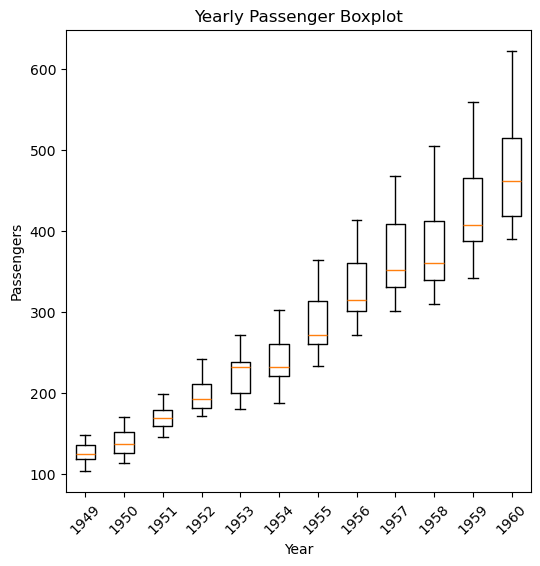

In [4]:
# matplotlib

years = sorted(flights['year'].unique())  # 연도 순 정렬
# data에는 연도별로 월별 승객 수가 담긴 리스트가 들어간다.
data = [flights[flights['year'] == year]['passengers'].values for year in years]

plt.figure(figsize=(6, 6))
plt.boxplot(data, labels=years)
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.title("Yearly Passenger Boxplot")
plt.xticks(rotation=45)
plt.show()

### scatterplot 그리기

In [5]:
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


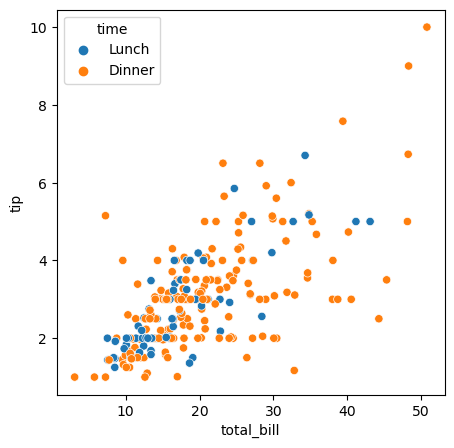

In [ ]:
# Seaborn

plt.figure(figsize=(5, 5))

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time') # hue - 색상옵션, 아래 예시에선 Dinner, Lunch에 대해서 색구분을 해줌.
plt.show()

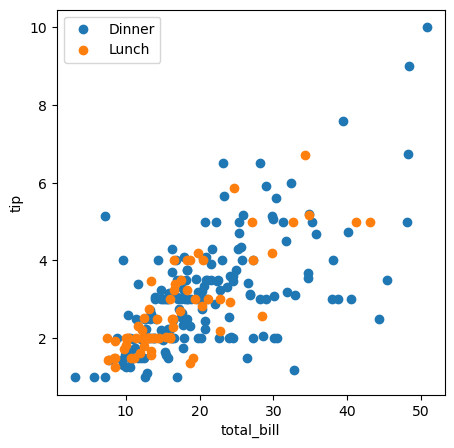

In [8]:
# matplotlib

dinner = tips[tips['time']=='Dinner']
dinner_x = dinner['total_bill']
dinner_y = dinner['tip']

lunch = tips[tips['time']=='Lunch']
lunch_x = lunch['total_bill']
lunch_y = lunch['tip']

plt.figure(figsize=(5, 5))
plt.scatter(dinner_x, dinner_y, label="Dinner")
plt.scatter(lunch_x, lunch_y, label="Lunch")
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.legend()
plt.show()

## 데이터 비교

In [3]:
import seaborn as sns

flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### 연도별 승객 수 시각화

/var/folders/hd/x78brj1j2zn2msbqhqqp8qs00000gn/T/ipykernel_3707/1288958829.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=flights, x="year", y="passengers", palette="rocket", errorbar=None) # ci > errorbar로 바뀜.


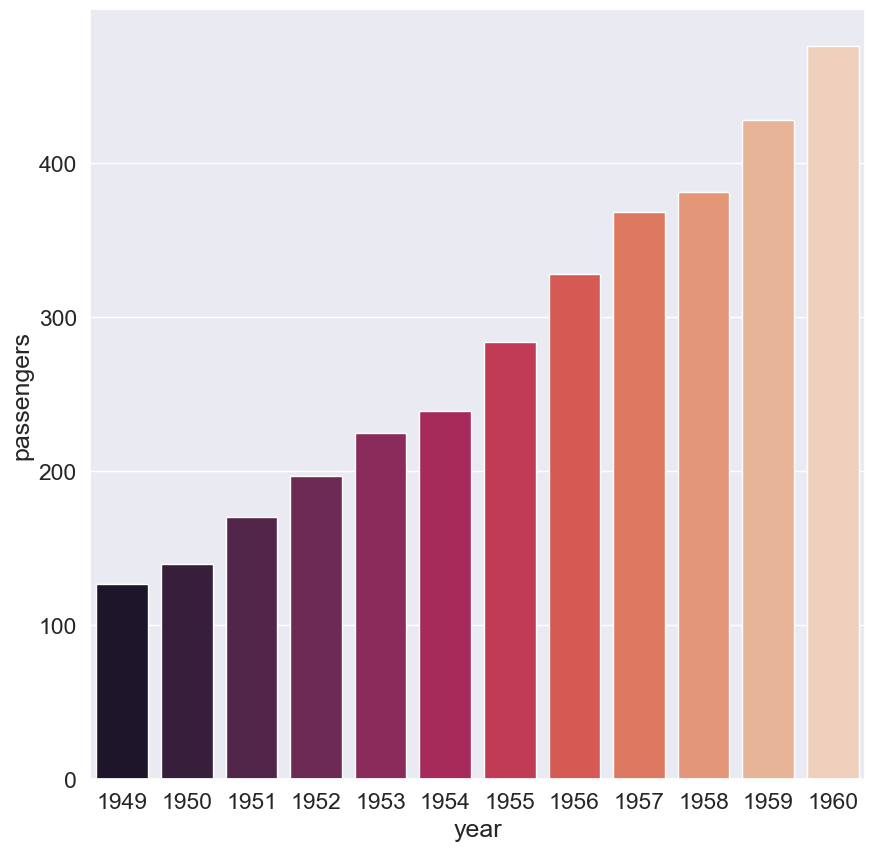

In [7]:
# 축의 글씨 크기 변경
# sns.set() 대신 sns.set_theme()를 사용. (없어질 예정이기 때문.)
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10, 10))
# palette : 색상 조합을 의미. 더 다양한 색상 조합은 https://seaborn.pydata.org/tutorial/color_palettes.html 참고.
sns.barplot(data=flights, x="year", y="passengers", palette="rocket", errorbar=None) # ci > errorbar로 바뀜.
plt.show()

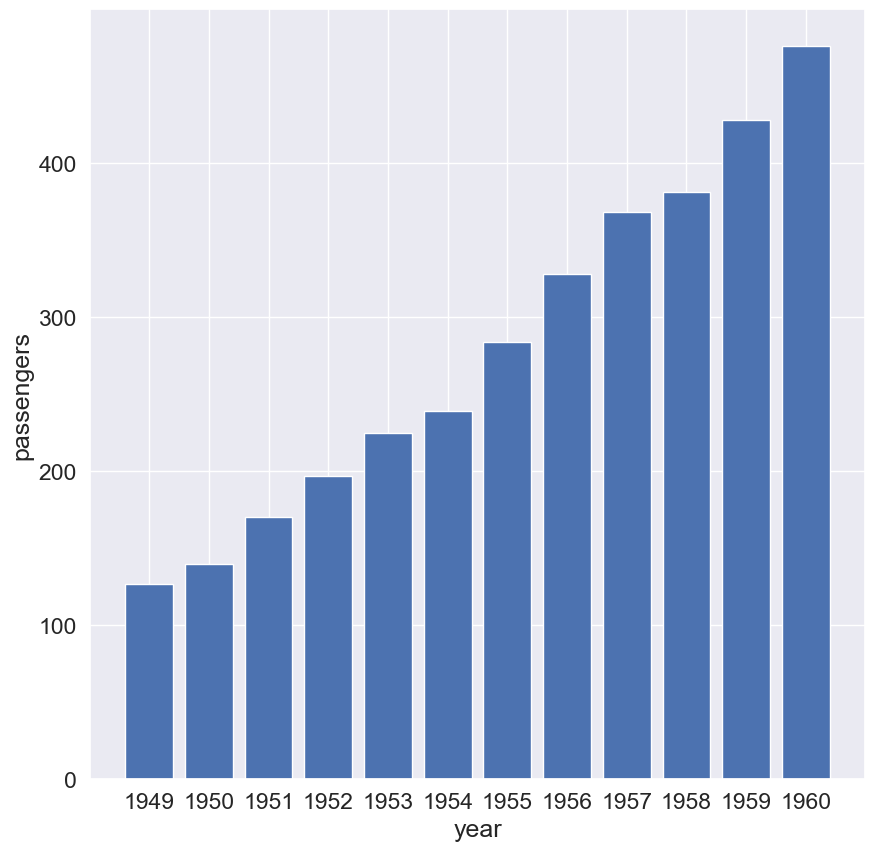

In [11]:
# matplotlib 버전.

avg_passengers = flights.groupby('year')['passengers'].mean()

plt.figure(figsize=(10, 10))
plt.bar(avg_passengers.index, avg_passengers.values)
plt.xticks(avg_passengers.index)
plt.ylabel('passengers')
plt.xlabel('year')
plt.show()

# sns.set_theme()를 호출하는 순간 모든 plot의 style을 seaborn 식으로 설정함.

### 비교하고 싶은 연도만 강조

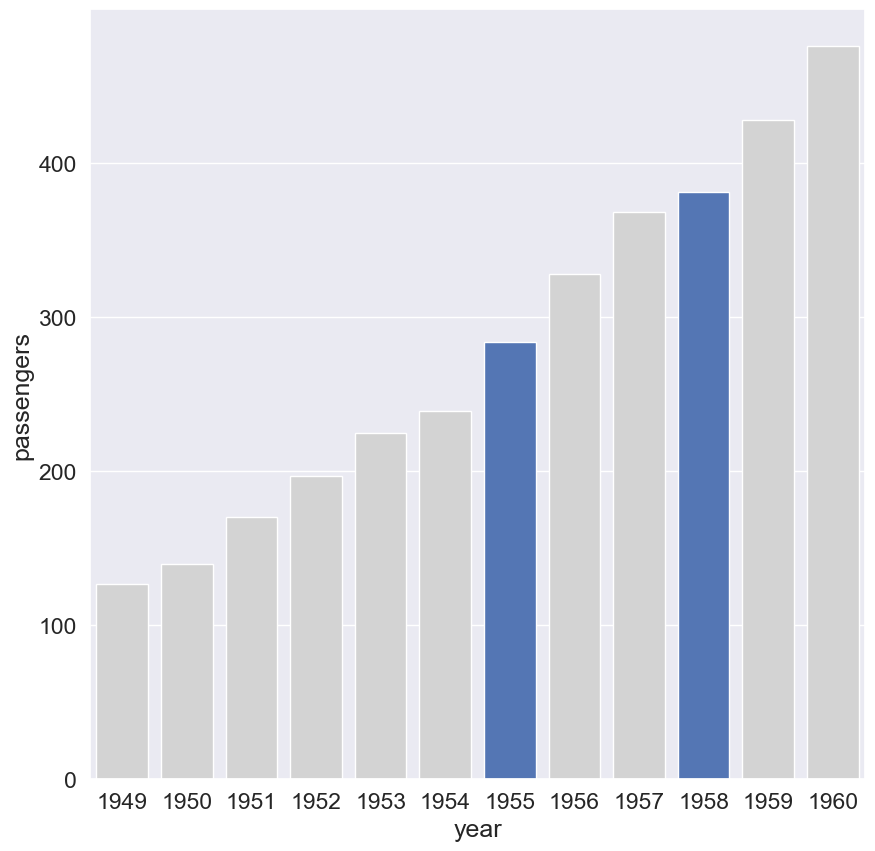

In [12]:
plt.figure(figsize=(10, 10))
flights_years = sorted(list(set(flights['year'])))
color = ['lightgrey' if x not in [1955, 1958] else "#4472C4" for x in flights_years]
sns.barplot(data=flights, x="year", y="passengers", palette=color, errorbar=None) # matplotlib도 color로 색상 변경 가능!
plt.show()

### 월별 승객 수 시각화

C:\Users\rando\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


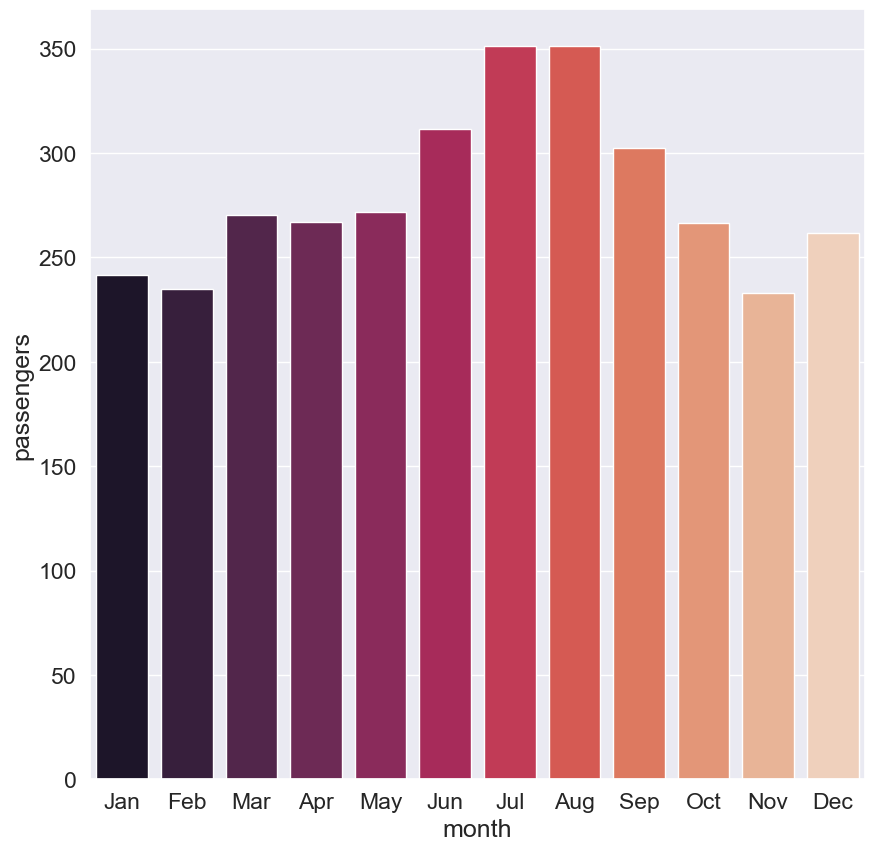

In [13]:
plt.figure(figsize=(10, 10))
sns.barplot(data=flights, x="month", y="passengers", palette="rocket", errorbar=None)
plt.show()

C:\Users\rando\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


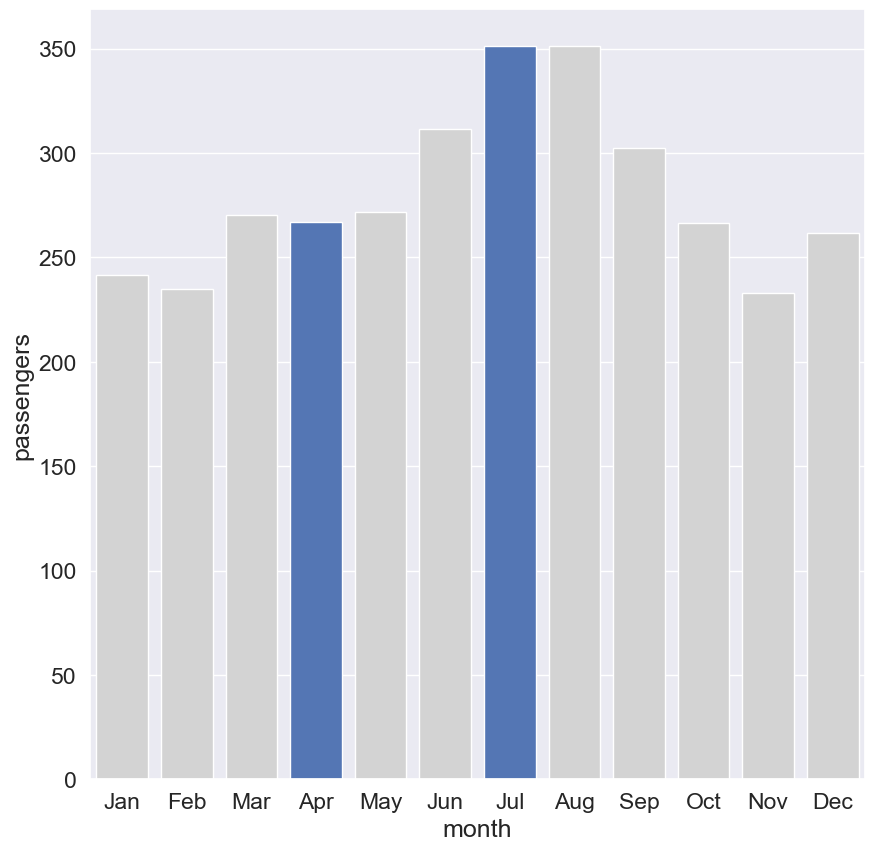

In [14]:
flights_month = flights['month'].unique()

plt.figure(figsize=(10, 10))
color = ['lightgrey' if not x in ['Apr', "Jul"] else "#4472C4" for x in flights_month]
sns.barplot(data=flights, x="month", y="passengers", palette=color, errorbar=None)
plt.show()

### 연도 별 승객 수 변화 비교

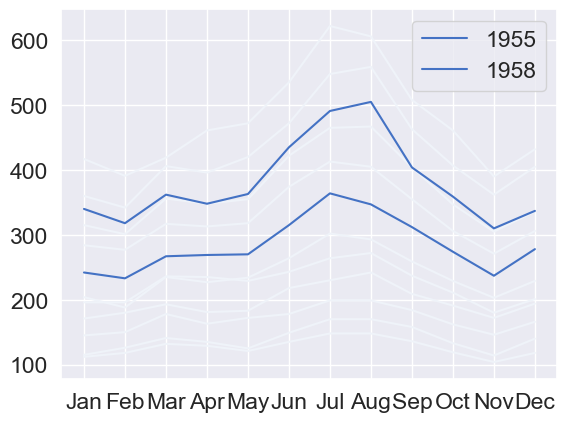

In [15]:
for year in flights["year"].unique():
    flights_for_year = flights[flights['year']==year]
    # 1955년과 1958년만 파란색 + 라벨 표시
    line_color = "#4472C4" if year == 1955 or year == 1958 else "#EFF3F9"
    label = year if year == 1955 or year == 1958 else None
    plt.plot(flights_for_year['month'], flights_for_year['passengers'], color=line_color, label=label)

plt.legend()
plt.show()

## 상관관계 분석

- 두 양적 변수 간의 선형 관계의 강도와 방향을 평가하는 것<br>예를 들어 키와 몸무게의 관계를 보았을 때 각가 두 변수가 선형적 관계가 모여있따면 선형적 상관관계(correlation)가 있다고 할 수 있다.

#### 공분산
- 두 변수의 공동 변동성을 설명하는 척도
- 두 변수가 어떻게 함께 변하는지를 이해하는데 도움이 될 수 있음
- 두 변수가 함께 증가하거나 감소하면 공분산은 양수가 된다. 
- 넘파이의 내장함수 cov를 사용하면 쉽게 계산이 가능하다

#### 상관관계
- 방향성만 명확하고 크기의 해석이 어려운 공분산과 달리, 방향+강도까지 해석이 가능하다
- 단위의 영향을 받지 않는다
- 넘파이의 내장함수인 np.corrcoef(x,y) 또는 판다스의 내장함수 df['X'].corr(df['Y'])로 쉽게 구할 수 있다.
- 상관계수의 값이 0에 가까울 수록 두 변수는 독립적이다

In [8]:
import pandas as pd

df = pd.DataFrame({"키 (cm)": [158, 163, 170, 183, 180], "몸무게": [49, 52, 60, 80, 83]})
df

,키 (cm),몸무게
0,158,49
1,163,52
2,170,60
3,183,80
4,180,83


In [10]:
import numpy as np

print(np.cov(df['키 (cm)'], df['몸무게'])) # 공분산  - 키&몸무게의 결과를 보면 164.7 > 양수값이므로 X가 증가하면 Y도 증가한다는 결과를 얻을 수 있음

[[114.7 164.7]
 [164.7 249.7]]


In [18]:
df['키 (m)'] = df['키 (cm)'] * 0.01
print(np.cov(df['키 (m)'], df['몸무게']))

[[1.147e-02 1.647e+00]
 [1.647e+00 2.497e+02]]


In [19]:
print(np.corrcoef(df['키 (cm)'], df['몸무게']))

[[1.         0.97320116]
 [0.97320116 1.        ]]


## 상관관계 시각화

In [11]:
import pandas as pd
import numpy as np
# scikit-learn : 머신러닝, 데이터 분석에 사용되는 라이브러리.
from sklearn import datasets

# 당뇨병 수치 예측 데이터.
dataset = datasets.load_diabetes()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [21]:
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
df['target'] = dataset['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


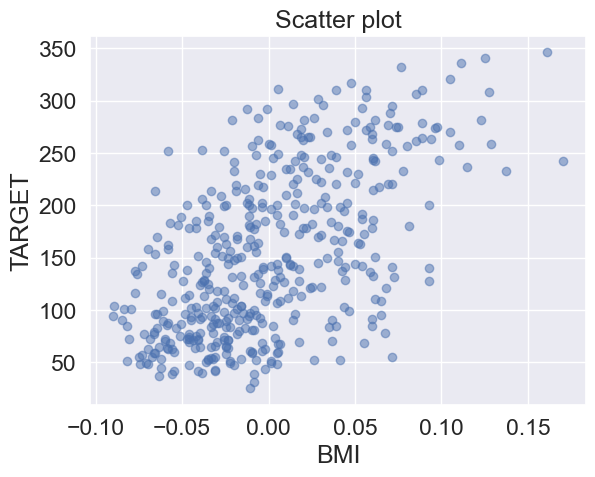

In [ ]:
import matplotlib.pyplot as plt

# alpha = 투명도
plt.scatter(df['bmi'], df['target'], alpha=0.5) # alpha > 그래프의 투명도
plt.title("Scatter plot")
plt.xlabel("BMI")
plt.ylabel("TARGET")
plt.show()

C:\Users\rando\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rando\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rando\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x800 with 0 Axes>

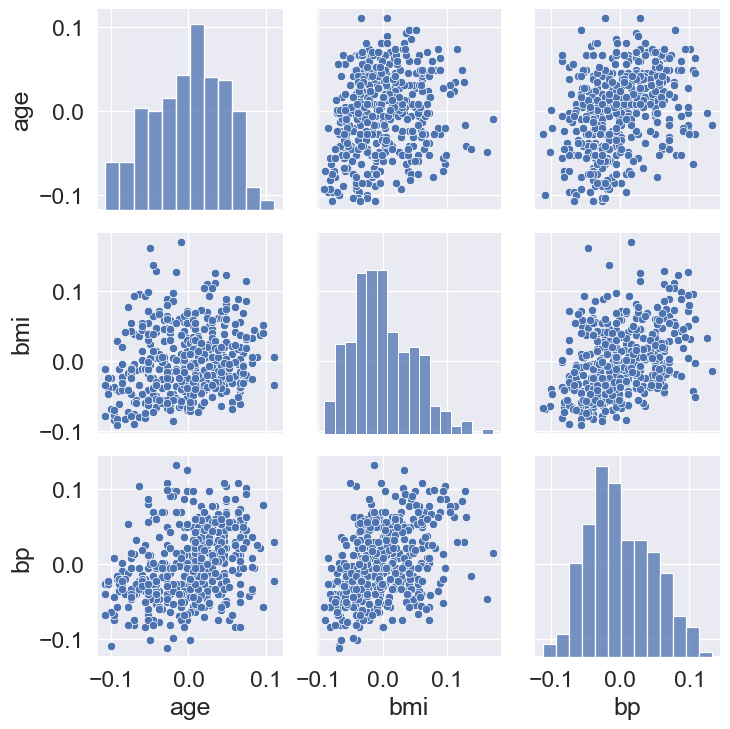

In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 8))
fig = sns.pairplot(df[['age', 'bmi', 'bp']]) # 나이 bmi지수, bp 사이의 상관관계를 각각 비교
plt.show()

### 히트맵 그리기

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6   

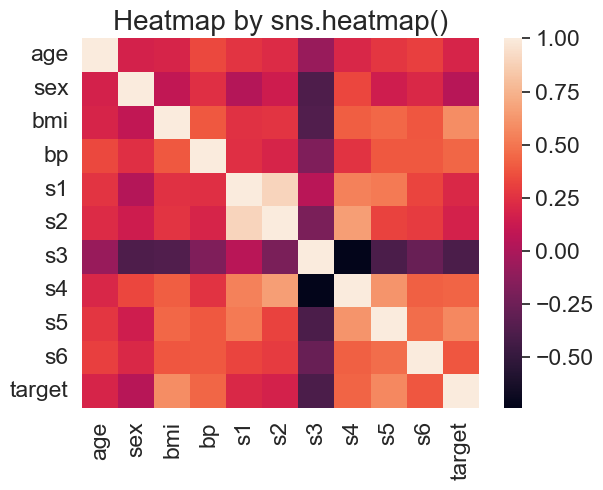

In [24]:
# seaborn

print(df.corr())
sns.heatmap(df.corr())
plt.title("Heatmap by sns.heatmap()", fontsize=20)
plt.show()

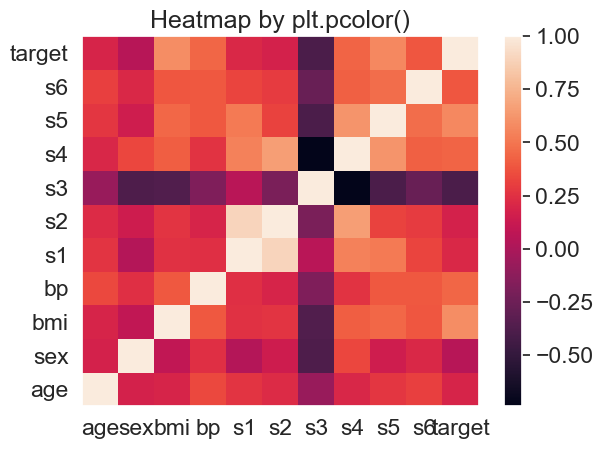

In [25]:
# matplotlib

plt.pcolor(df.corr())

# 0.5, 1.5, 2.5, ... 
# -> 0.5를 쓰는 이유는 글자의 위치를 가운데에 위치시키기 위함.
tick_position = np.arange(0.5, len(df.columns), 1)
plt.xticks(tick_position, df.columns)
plt.yticks(tick_position, df.columns)
plt.title("Heatmap by plt.pcolor()")
plt.colorbar()
plt.show()

## 데이터 스케일링

### 데이터 스케일링의 필요성
- 모든 변수를 동일한 범위로 만들기 때문에 쉽게 비교할 수 있게 만듬
- 규모가 큰 변수의 영향이 그러지 못한 변수보다 크게 작용되는 것을 방지한다 
- 이상치를 처리하는데 효과적이다

### 데이터 스케일링의 종류 
#### Min-Max 스케일링
- 변수의 값을 변수의 최소값과 최대값을 사용하여 0과 1 사이의 값으로 변환
#### 표준화
- 변수의 값을 평균이 0이고, 표준편차가 1이 되도록 변환
#### 로버스트 스케일링
- 변수의 값을 중앙값 0이고, 사분위범위(IQR)이 1이 되도록 변환한다. (보통 이상치가 있을 때 사용하면 효과가 좋음)

> `scikit-learn`이란?
>
> python 기반의 오픈소스 머신러닝 라이브러리로 분류, 회귀, 군집화, 차원축소, 모델평가 등 대부분의 머신러닝 과정을 지원한다. 


In [15]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()   # 유방암에 걸릴 확률에 대한 데이터셋

df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 표준화
평균이 0, 표준편차가 1이 되도록 스케일링

In [13]:
X = cancer.data

std = StandardScaler() # 표준화 : 평균이 0, 표준편차가 1이 되도록
std.fit(X)  # 학습을하고
X_scaled = std.transform(X) # 적용까지 해줘야하는거임

print("Before data scaling")
print(X.min(), X.max())

print("After data scaling")
print(X_scaled.min(), X_scaled.max())

Before data scaling
0.0 4254.0
After data scaling
-3.1120847879199744 12.072680399588076


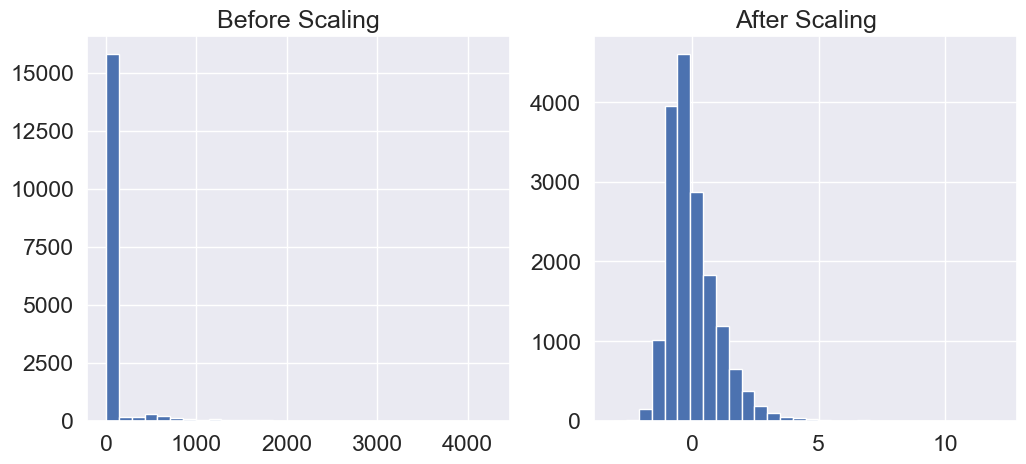

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

X_reshape = X.reshape(17070, 1)
# bins=30 : 30개의 막대그래프로 나눈다.
ax[0].hist(X_reshape, bins=30)
ax[0].set_title("Before Scaling")

X_scaled_reshape = X_scaled.reshape(17070, 1)
ax[1].hist(X_scaled_reshape, bins=30)
ax[1].set_title("After Scaling")

plt.show()

### MIn-Max Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X)

X_scaled = mms.transform(X)
print("Before data scaling")
print(X.min(), X.max())

# 컴퓨터는 이진수를 사용하기 때문에 실수를 정확하게 표현하지 못함.
print("After data scaling")
print(X_scaled.min(), X_scaled.max())

Before data scaling
0.0 4254.0
After data scaling
0.0 1.0000000000000002


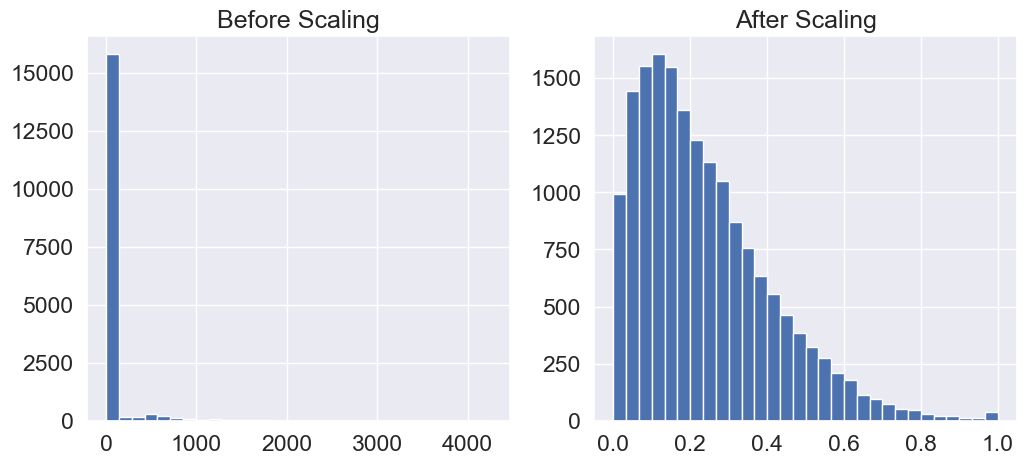

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

X_reshape = X.reshape(17070, 1)
ax[0].hist(X_reshape, bins=30)
ax[0].set_title("Before Scaling")

X_scaled_reshape = X_scaled.reshape(17070, 1)
ax[1].hist(X_scaled_reshape, bins=30)
ax[1].set_title("After Scaling")

plt.show()

In [31]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
rbs.fit(X)
X_scaled = rbs.transform(X)
print("Before data scaling")
print(X.min(), X.max())

print("After data scaling")
print(X_scaled.min(), X_scaled.max())

Before data scaling
0.0 4254.0
After data scaling
-2.284204965662968 18.934528163862478


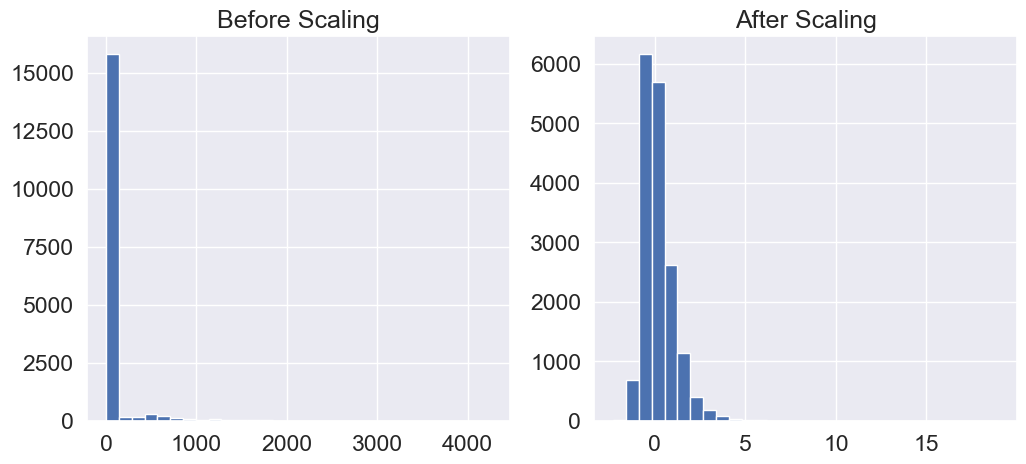

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

X_reshape = X.reshape(17070, 1)
ax[0].hist(X_reshape, bins=30)
ax[0].set_title("Before Scaling")

X_scaled_reshape = X_scaled.reshape(17070, 1)
ax[1].hist(X_scaled_reshape, bins=30)
ax[1].set_title("After Scaling")

plt.show()

스케일링 적용 방식 결정은 모델에 따라서!

## 데이터 전처리
데이터를 분석하기에 효과적인 형태로 가공
- 데이터 정제
  - 누락된 값, 잡음, 일관성 없는 데이터 처리
- 특징 엔지니어링
  - 기존의 특징에서 새로운 특징을 생성하거나 변환
- 불균형 데이터처리
  - 분류작업에서 한 클래스가 다른 클래스보다 우세하면 모델 편향이 일어남
  - 클래스를 균형있게 하기 위해 오버샘플링 언더샘플링과 같은 기술을 사용해서 불균형 데이터를 처리한다

In [16]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [34]:
# deck 열은 null 값이 너무 많기 때문에 drop -> 신빈성 부족

titanic = titanic.drop(columns='deck')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [35]:
# interpolate : 선형 보간. null값의 이전 데이터와 이후 데이터의 중간값으로 대체.
titanic['age'] = titanic['age'].interpolate()
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB
None


## 특성 엔지니어링

In [36]:
import seaborn as sns

data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


생존 여부를 0, 1로 표현해서 생존 여부와 요금의 상관관계를 확인

In [37]:
titanic['alive_1'] = np.where(titanic['alive']=='yes', 1, 0)
titanic_sub = titanic[['fare', 'alive_1']]

print(titanic_sub.corr())

             fare   alive_1
fare     1.000000  0.257307
alive_1  0.257307  1.000000


표 값이 50을 넘으면 비싼 표를 의미하는 1, 아니면 0으로 하는 새로운 칼럼 추가

In [38]:
titanic['expensive'] = np.where(titanic['fare'] > 50, 1, 0)

출신 도시가 퀸즈타운이면 오세아니아로, 아니면 유럽으로 하여 승객의 출신 대륙 칼럼을 추가

In [39]:
titanic['continent'] = np.where(titanic['embark_town']=="Queenstown", "Oceania", "Europe")

In [40]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,alive_1,expensive,continent
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,0,0,Europe
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1,1,Europe
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,1,0,Europe
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1,1,Europe
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,0,0,Europe


## 미션 1

In [42]:
import pandas as pd

WEEK_KOR = {0: "월", 1: "화", 2: "수", 3: "목", 4: "금", 5: "토", 6: "일"}

df = pd.DataFrame({"DateTime": ["2025-05-26", "2025-05-27", "2025-05-28"]})
df["DateTime"] = pd.to_datetime(df["DateTime"])
print(df["DateTime"])

df["요일"] = df["DateTime"].dt.dayofweek
print(df["요일"])

df["요일"] = df["요일"].map(WEEK_KOR)
print(df["요일"])
df.head()

0   2025-05-26
1   2025-05-27
2   2025-05-28
Name: DateTime, dtype: datetime64[ns]
0    0
1    1
2    2
Name: 요일, dtype: int32
0    월
1    화
2    수
Name: 요일, dtype: object


,DateTime,요일
0,2025-05-26,월
1,2025-05-27,화
2,2025-05-28,수
